# SCC-ICMC-USP - 2o. semestre de 2021
# SCC0275 - Exercício 6

### Profa. Roseli A. F. Romero

### Monitor: Kenzo Sakiyama

Nro do grupo:

Alunos:


1.   Éverton Luís Mendes da Silva (10728171)


## Parte 1 - Medidas de avaliação e bootstrap

---


### Carregando dados e definindo função de preprocessamento

Para as próximas questões, utilizaremos o dataset **breast_cancer** disponibilizado pelo sklearn. A descrição do conjunto de dados e de seus atributos será apresentada a seguir (atente-se ao atributo alvo "class").


In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["class"] = data.target

In [2]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
print(data["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def preproc_fn(x_treino, x_teste, y_treino, y_teste):

  scaler = MinMaxScaler()
  # Computando estatísticas dos dados de treino
  scaler.fit(x_treino)
  # Transformando dados com a normalização MinMax
  x_treino_novo = scaler.transform(x_treino)
  x_teste_novo = scaler.transform(x_teste)

  # Não é necessário alterar os labels a menos que seja feito um tipo de amostragem (over/under sampling)
  y_treino_novo = y_treino
  y_teste_novo = y_teste

  return x_treino_novo, x_teste_novo, y_treino_novo, y_teste_novo

In [17]:
def score_metrics(real, pred, score_type):
    
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import balanced_accuracy_score
    from sklearn.metrics import zero_one_loss
    from sklearn.metrics import precision_score
    
    metrics=[accuracy_score, balanced_accuracy_score, zero_one_loss, precision_score]
    metrics_name=['accuracy_score', 'balanced_accuracy_score', 'zero_one_loss', 'precision_score']
    
    for index, metric in enumerate(metrics_name):
        if metric==score_type:
            score=metrics[index](real, pred)
            
    return score

### Questão 01. 

-  Implemente a técnica bootstrap utilizando a função abaixo
- Sugestão, utilize o material de apoio como referência

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from numpy import mean, std
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


def classificacao_bootstrap(data_df, columns, target, preproc_fn, score_fn, score_name, conf_matrix_fn, 
                   no_bs=1000, p_teste=0.2, plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    preproc_fn: Função. Faz o pré-processamento da base já separada em treino e teste 
    score_fn:   Função. A função que calcula a medida de desempenho desejada. Deve ser uma 
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em 
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    score_name: String. Uma string com o nome da medida de desempenho
    conf_matrix_fn: Função. Calcula matriz de confusão 
    folds:      Inteiro. Número de folds na validação cruzada
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 6 modelos (perceptron, 
    SVM com kernel polinomial de grau 3, Árvore de decisão, 3NN, 5NN, e 7NN)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados, as medidas de desempenho e matriz de confusão
    """
    import numpy as np
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    svm_poly=SVC(kernel='poly', degree=3)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data_df)*0.1))
    _3nn = KNeighborsClassifier(n_neighbors=3)
    _5nn = KNeighborsClassifier(n_neighbors=5)
    _7nn = KNeighborsClassifier(n_neighbors=7)
    
    clfs = [prcp, svm_poly, dt, _3nn, _5nn, _7nn]
    clfs_names = ['perceptron', 'svm_poly', 'dt', '_3nn', '_5nn', '_7nn']
    
    #Inicializa estruturas para matrizes de confusão
    
    confusion_matrices = {model_name:np.zeros((2,2)) for model_name in clfs_names} 
    '''confusion_matrices = {
        'perceptron': np.zeros((2,2)),
        'svm_poly':np.zeros((2,2)),
        'dt': np.zeros((2,2)),
        '_3nn':np.zeros((2,2)),
        '_5nn':np.zeros((2,2)),
        '_7nn':np.zeros((2,2)),
    }
    '''
    
    results = {model_name:[] for model_name in clfs_names}
    for clf, clf_name in zip(clfs, clfs_names):
      ################# IMPLEMENTE AQUI O BOOTSTRAP #########################
        #    Dentro desse loop:
        #     c: variável-objeto que representa o classificador
        #     c_name: Nome do classificador
        #     results: dicionário com vetores de resultado para cada classificador
      #######################################################################        
     
      #####################  ###############################################
      
      for i in range(0, no_bs):
        
        bs_samples=data_df.sample(n=data_df.shape[0], replace=True)
        
        X=bs_samples.iloc[:, columns]
        y=bs_samples.iloc[:, target]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=p_teste)
        X_train, X_test, y_train, y_test=preproc_fn(X_train, X_test, y_train, y_test)
        
        data_df_train = pd.DataFrame(data=np.c_[X_train, y_train], columns= data_df.columns)
        class_0 = data_df_train[data_df_train['class'] == 0]
        class_1 = data_df_train[data_df_train['class'] == 1]
        
        # Coletando o número de exemplos da classe 0 para superamostragem da classe 1  
        n_elementos_class_0 = data_df_train['class'].value_counts()[0] 
        # Superamostragem da classe 1 para numero de elementos da classe 0
        data_df_train = pd.concat([class_0, class_1.sample(n=n_elementos_class_0, replace=True)])

        X_train, y_train = data_df_train.iloc[:, columns], data_df_train.iloc[:, target]
        
        clf.fit(X_train, y_train)
        y_pred=clf.predict(X_test)
        
        score=score_fn(y_test, y_pred, score_name)
        results[clf_name].append(score)
        confusion_matrices[clf_name] += conf_matrix_fn(y_test, y_pred, labels=[0, 1])
              
      
    if not plot:
        return {'results': results, 'clfs':clfs}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs, 'confusion_matrices': confusion_matrices}

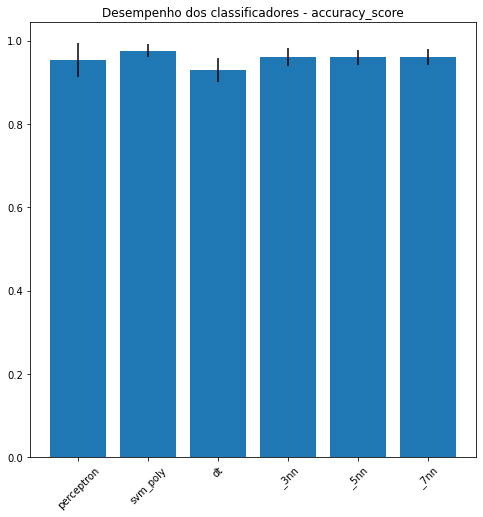

In [8]:
results = classificacao_bootstrap(data_df=df, columns=[i for i in range(len(df.columns)-1)], target=len(df.columns)-1, preproc_fn=preproc_fn, score_fn=score_metrics, score_name='accuracy_score', conf_matrix_fn=confusion_matrix)

### Questão 02. 

- Rode a função 4 vezes utilizando 2 métricas diferentes do **sklearn.metrics** (2 execuções por métrica);
- Compare os resultados e discuta as vantagens/desvantagens de cada uma das métricas

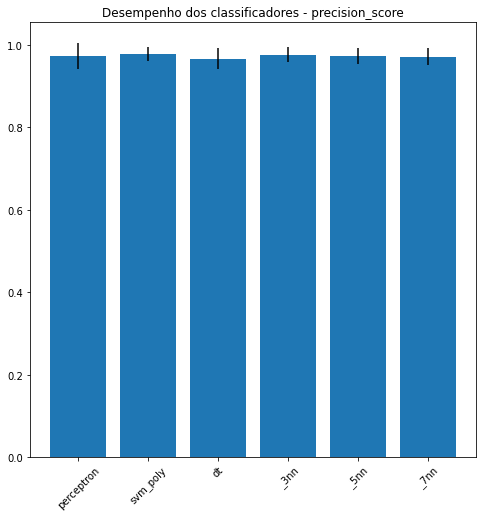

In [9]:
resultsOne = classificacao_bootstrap(data_df=df, columns=[i for i in range(len(df.columns)-1)], target=len(df.columns)-1, preproc_fn=preproc_fn, score_fn=score_metrics, score_name='precision_score', conf_matrix_fn=confusion_matrix)

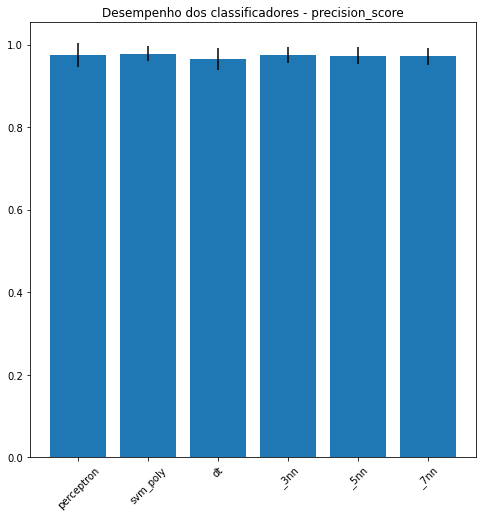

In [10]:
resultsTwo = classificacao_bootstrap(data_df=df, columns=[i for i in range(len(df.columns)-1)], target=len(df.columns)-1, preproc_fn=preproc_fn, score_fn=score_metrics, score_name='precision_score', conf_matrix_fn=confusion_matrix)

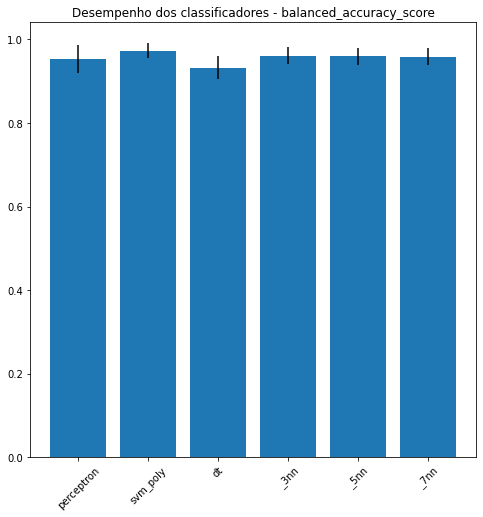

In [11]:
resultsThree = classificacao_bootstrap(data_df=df, columns=[i for i in range(len(df.columns)-1)], target=len(df.columns)-1, preproc_fn=preproc_fn, score_fn=score_metrics, score_name='balanced_accuracy_score', conf_matrix_fn=confusion_matrix)

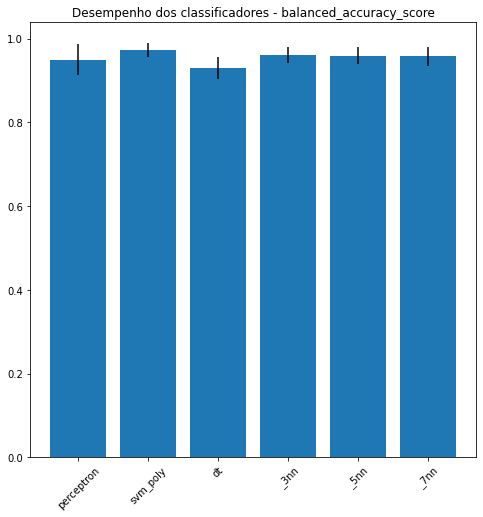

In [12]:
resultsFour = classificacao_bootstrap(data_df=df, columns=[i for i in range(len(df.columns)-1)], target=len(df.columns)-1, preproc_fn=preproc_fn, score_fn=score_metrics, score_name='balanced_accuracy_score', conf_matrix_fn=confusion_matrix)

First, I will discuss the advantages and disadvantages of each of the metrics used in this study, and then I will discuss the results obtained.
- precision score:


 Precision is the ratio of correctly predicted positive observations to the total predicted positive observations, that is, Precision = TP/TP+FP. For example, for breast cancer this metric is very good because we want to make sure that those who have tested truly positive received the necessary treatment, as false positives would suffer greatly from treatment if they were healthy. On the other hand, in this metric we do not take into account false negatives, and in view of that, we would have people who would only start treatment at a critical stage of the disease.



- balanced accuracy score:

This metric has almost the same idea as the 'accuracy' metric, however it takes into account whether the data is balanced or not. That is, for the 'accuracy', if the data are unbalanced, the calculated score will take more into account the class with the highest incidence number ( (TP+TN)/(TP+TN+FP+FN) ). On the other hand, 'balanced accuracy' considers each of the classes for its final score, that is, it considers the unbalance of the data due to its specificity and sensitivity.

Balacend accuracy= (sensitivity + specificity)/2  , sensitivity=TP/(TP+FN) and specificity=TN/(FP+TN)

In this example, balanced accuracy was not as relevant because the data was balanced for training. However, in real life, the number of healthy people, most of the time, tends to be much higher than the sick ones, therefore, the obtained score would be biased towards the prediction of the healthy ones.

    


In [20]:
list_of_results=[resultsOne, resultsTwo, resultsThree, resultsFour]

study={str(i):{} for i in range(len(list_of_results))}
for index, project in enumerate(list_of_results):
    
    study[str(index)]={name:mean(project['results'][name]) for name in ['perceptron', 'svm_poly', 'dt', '_3nn', '_5nn', '_7nn']}
    study[str(index)]=sorted(study[str(index)].items(), key=lambda x: x[1], reverse=True)


<class 'dict'>


In [28]:
for i in study.keys():
    print("The %s project obtained a descending order below:"%(str(int(i)+1)))
    for n_clfs in study[i]:
        print(" clf {} : {}".format(*n_clfs))

The 1 project obtained a descending order below:
 clf svm_poly : 0.9778523155951143
 clf _3nn : 0.976583969806384
 clf perceptron : 0.9732034297645421
 clf _5nn : 0.9728483823975261
 clf _7nn : 0.9712828753973289
 clf dt : 0.9662459827303606
The 2 project obtained a descending order below:
 clf svm_poly : 0.9780382763146168
 clf _3nn : 0.9756568180594232
 clf perceptron : 0.9742759372633818
 clf _5nn : 0.9730805361846537
 clf _7nn : 0.9718862927888499
 clf dt : 0.9654551865445767
The 3 project obtained a descending order below:
 clf svm_poly : 0.9731485541470452
 clf _3nn : 0.9608385851508747
 clf _5nn : 0.9593146137630938
 clf _7nn : 0.9586170197940539
 clf perceptron : 0.9529427111832587
 clf dt : 0.9324627584283639
The 4 project obtained a descending order below:
 clf svm_poly : 0.9729354425649135
 clf _3nn : 0.9609418542161905
 clf _5nn : 0.9599652071119458
 clf _7nn : 0.9577610340852368
 clf perceptron : 0.9500535243979858
 clf dt : 0.9310717084260388


## Parte 2 - Curva ROC e Teste de hipótese

## Funções novas utilizadas no exercício

- `pandas.Series.nunique()` ([link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html)): Conta quantidade de valores únicos de uma coluna. Útil para verificar se uma coluna é relevante ou não
- `scipy.stats.ttest_ind()` ([link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind)): Calcula o teste t para duas amostras independentes
- `sklearn.metrics.plot_roc_curve()` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html)): Plota a curva ROC de um classificador dado um conjunto de input e alvo

### Questão 01.

Faça a exploração dos dados. Isto é, carregue, substitua valores faltantes, padronize os dados, etc. Faça também a seleção dos atributos que achar mais relevantes. 

 - Dica: Utilize a função `nunique()` durante a exploração dos dados. Você pode utilizar o "bom senso" (além de outras ferramentas é claro) na hora de escolher qual atributo do conjunto manter

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

df = pd.read_csv("titanic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


With this image we can see the Nan values of my Dataframe


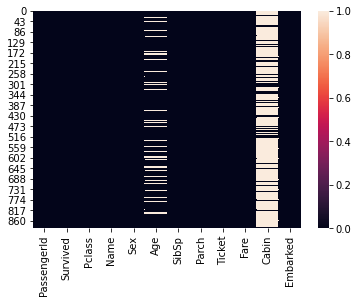

In [2]:
sn.heatmap(df.isna())
print("With this image we can see the Nan values of my Dataframe")

Devido ao alto número de valores Nan na variável "Cabin", vamos desconsiderar esse atributo(as informações contidas nele podem ser "adquiridas" através das tarifas pagas por cada passageiro). Os valores de Nan existem porque muitos passageiros ficavam nos porões dos navios ou eram passageiros ilegais. Ou seja, outra forma de lidar com esse problema seria considerar Nan como uma classe separada e alterar as cabines de acordo com seu bloco, isto é, C125 ou C120 seriam apenas C. 

Due to the high number of Nan values ​​in the "Cabin" variable, we will disregard this attribute (the information contained in it can be "acquired" through the fees paid by each passenger). Nan's values ​​exist because many passengers stayed in ships' holds or were illegal passengers. In other words, another way to deal with this problem would be to consider Nan as a separate class and change the cabins according to its block, ie C125 or C120 would be just C.

In [3]:
dropout_features=["Cabin"]

In [4]:
# Etapas de pré-processamento que podem ser feitas antes de separar em treino/teste vão aqui
for feature in df.columns:
    print(feature, df[feature].nunique())

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 88
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 147
Embarked 3


Due to the high number of unique values ​​for the variables "PassengerId", "Ticket", "Name" we can disregard them for analysis, as they only represent an identification of the individual.

In [5]:
dropout_features.extend(["Ticket", "PassengerId", "Name"])

In [6]:
df.drop(columns=dropout_features, inplace=True)

In [7]:
features_df=df.drop(columns="Survived")
target_df=df["Survived"]

In [8]:
# Etapas de pré-processamento que serão feitas após os dados estarem divididos vão na função
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np

features_categoricos = [attribute for attribute in features_df.columns.tolist() if attribute not in features_df._get_numeric_data().columns.tolist()]
features_numericos = features_df._get_numeric_data().columns.tolist()

X_train, X_test, y_train, y_test=train_test_split(features_df, target_df, train_size=0.8)
print(X_train.shape)


def preprocess(X_train, X_test, y_train, y_test, features_categoricos, features_numericos):
    
  pipeline_numerico = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='mean'))])

  pipeline_categorico = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='most_frequent')),
      ('onehot', OneHotEncoder())])

  # Criando a transformação do conjunto de dados:
  transformacao = ColumnTransformer(
      transformers=[
          ('transformacao numerica', pipeline_numerico, features_numericos),
          ('transformacao categorica', pipeline_categorico, features_categoricos),        
      ])

  X_train=transformacao.fit_transform(X_train)
  X_test=transformacao.fit_transform(X_test)
  
  scaler=StandardScaler().fit(X_train)
  X_train=scaler.transform(X_train)
  X_test=scaler.transform(X_test)
  
  
  return X_train, X_test, y_train, y_test

(712, 7)


In [9]:
X_train, X_test, y_train, y_test=preprocess(X_train, X_test, y_train, y_test, features_categoricos, features_numericos)
print(X_train.shape)

(712, 10)


### Questão 02.

Separe o conjunto de dados de maneira estratificada (através do parâmetro `stratify` da função `train_test_split`) em 20% para teste e 80% para treino. Depois plote a curva ROC (`sklearn.metrics.plot_roc_curve`) para **todos** os classificadores (no mesmo gráfico). 

Os melhores classificadores da questão anterior também apresentaram melhor desempenho na curva ROC? O que pode ter ocorrido? Teste diferentes valores de `random_state` na função `train_test_split` e observe o comportamento das curvas.


*   Dica: Para plotar múltiplas curvas ROC no mesmo gráfico, defina uma figura com `fig, ax = plt.subplots()` e passe `ax` como parâmetro da função `plot_roc_curve`. Não se esqueça de passar também o nome do classificador para que o seu gráfico fique mais fácil de interpretar



In [10]:
# Separar conjunto e pré processamento
df_novo = df.copy(deep=True)
X = df_novo.drop(columns="Survived")
y = df_novo["Survived"]

In [11]:
features_categoricos = [attribute for attribute in X.columns.tolist() if attribute not in X._get_numeric_data().columns.tolist()]
features_numericos = X._get_numeric_data().columns.tolist()

In [12]:
from sklearn.model_selection import train_test_split

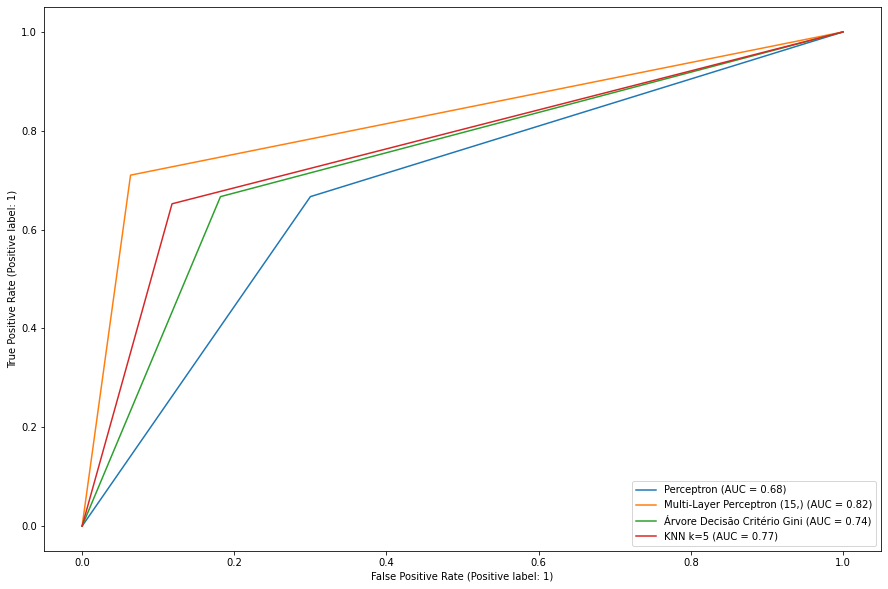

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, metrics
import numpy as np
from sklearn.metrics import plot_roc_curve #plot_roc_curve is Deprecated, then I won't use in analysis. On the other hand I used RocCurveDisplay

classificadores = {
  "Perceptron" : {"modelo": Perceptron(), "scores": []},
  "Multi-Layer Perceptron (15,)" : {"modelo": MLPClassifier(random_state=1, hidden_layer_sizes=(15,), max_iter=2000), "scores": []},
  "Árvore Decisão Critério Gini" : {"modelo": DecisionTreeClassifier(criterion='gini'), "scores": []},  
  "KNN k=5" : {"modelo": KNeighborsClassifier(n_neighbors=5), "scores": []}
}

plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots()
for classificador_name in classificadores:  
  # Seu código aqui:
  X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.8)
  # 1) Preprocessamento
  X_train, X_test, y_train, y_test=preprocess(X_train, X_test, y_train, y_test, features_categoricos, features_numericos)
  # 2) Fit
  classificadores[classificador_name]["modelo"].fit(X_train, y_train)
  # 3) Predict
  predicted=classificadores[classificador_name]["modelo"].predict(X_test)
  
  
  ax.add_image=metrics.RocCurveDisplay.from_predictions(y_test, predicted, ax=ax, name=classificador_name)
  
plt.show() 

### Questão 03.

Implemente o 10-Fold Cross Validation (pode usar o scikit) com os dois melhores classificadores de acordo com a curva ROC e guarde a acurácia de cada fold na chave 'scores' do dicionário de classificadores.
- Sugestão: utilize o gabarito do Ex5 como referência para implementação.

De acordo com a curva ROC os dois melhores classificadores são o KNN(AUC=0.77) e o Multi_layer Percecptron(0.82)

In [18]:
from sklearn.model_selection import KFold
import numpy as np

best_classifiers={
    "Multi-Layer Perceptron (15,)" : {"modelo": MLPClassifier(random_state=1, hidden_layer_sizes=(15,), max_iter=2000), "scores": []},  
    "KNN k=5" : {"modelo": KNeighborsClassifier(n_neighbors=5), "scores": []}
}

features_categoricos = [attribute for attribute in df_novo.drop(columns="Survived").columns.tolist() if attribute not in df_novo.drop(columns="Survived")._get_numeric_data().columns.tolist()]
features_numericos = df_novo.drop(columns="Survived")._get_numeric_data().columns.tolist()

cv = KFold(n_splits=10, shuffle=True)
for classifier_name in best_classifiers:
    for train_index, test_index in cv.split(df_novo):
    
        features_name=df_novo.drop(columns="Survived").columns
        target_name=["Survived"]
        
        X_train, y_train = df_novo.iloc[train_index][features_name], df_novo.iloc[train_index][target_name]
        X_test, y_test = df_novo.iloc[test_index][features_name], df_novo.iloc[test_index][target_name]
        X_train, X_test, y_train, y_test=preprocess(X_train, X_test, y_train, y_test, features_categoricos, features_numericos)
        
        best_classifiers[classifier_name]["modelo"].fit(X_train, np.ravel(y_train))
        prediction=best_classifiers[classifier_name]["modelo"].predict(X_test)
        my_score=score_metrics(y_test, prediction, 'accuracy_score')
        
        best_classifiers[classifier_name]["scores"].append(my_score)
        
        #X_train, X_test, y_train, y_test=preprocess(X_train, X_test, y_train, y_test, features_categoricos, features_numericos)
    
     

### Questão 04.

Verifique se há diferença estatística significante entre suas acurácias da questão anterior utilizando o teste T (`scipy.stats.ttest_ind`). Considere que há diferença significante se p <= 0.05 (rejeita-se a hipótese nula)

In [19]:
from scipy.stats import ttest_ind

t_statistic, p_values=ttest_ind(best_classifiers["Multi-Layer Perceptron (15,)"]["scores"], best_classifiers["KNN k=5"]["scores"])

In [20]:
print(t_statistic, p_values)

2.0418508837741833 0.05610063159489807


In [21]:
print("Due to the p_value of {} we can see that there is not a null hypothesis in this Test(but the value almost got that)".format(p_values))

Due to the p_value of 0.05610063159489807 we can see that there is not a null hypothesis in this Test(but the value almost got that)


i.e. There is a difference using one or other model